In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import time

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [2]:
def generate_data(m):
    w_star = np.random.normal(0, 1, size=(10,))
    w_star /= np.linalg.norm(w_star)

    X = np.random.normal(0, 1, size=(m, 10))
    y = np.random.binomial(1, sigmoid(np.dot(X, w_star)))

    return w_star, X, y

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [3]:
def logistic_regression(X, y):
    model = LogisticRegression(max_iter=1000)
    model.fit(X, y)
    return model.coef_.reshape(-1)

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [4]:
def gradient_descent(X, y, eta=0.01, num_iterations=1000):
    n, d = X.shape
    w = np.zeros(d)

    for _ in range(num_iterations):
        y_pred = sigmoid(np.dot(X, w))
        gradient = np.dot(X.T, (y_pred - y)) / n
        w -= eta * gradient

    return w

def stochastic_gradient_descent(X, y, eta=0.01, num_iterations=1000):
    n, d = X.shape
    w = np.zeros(d)

    for _ in range(num_iterations):
        random_index = np.random.randint(0, n)
        x_i, y_i = X[random_index], y[random_index]
        y_pred = sigmoid(np.dot(x_i, w))
        gradient = np.dot(x_i.T, y_pred - y_i)
        w -= eta * gradient

    return w

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w -
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

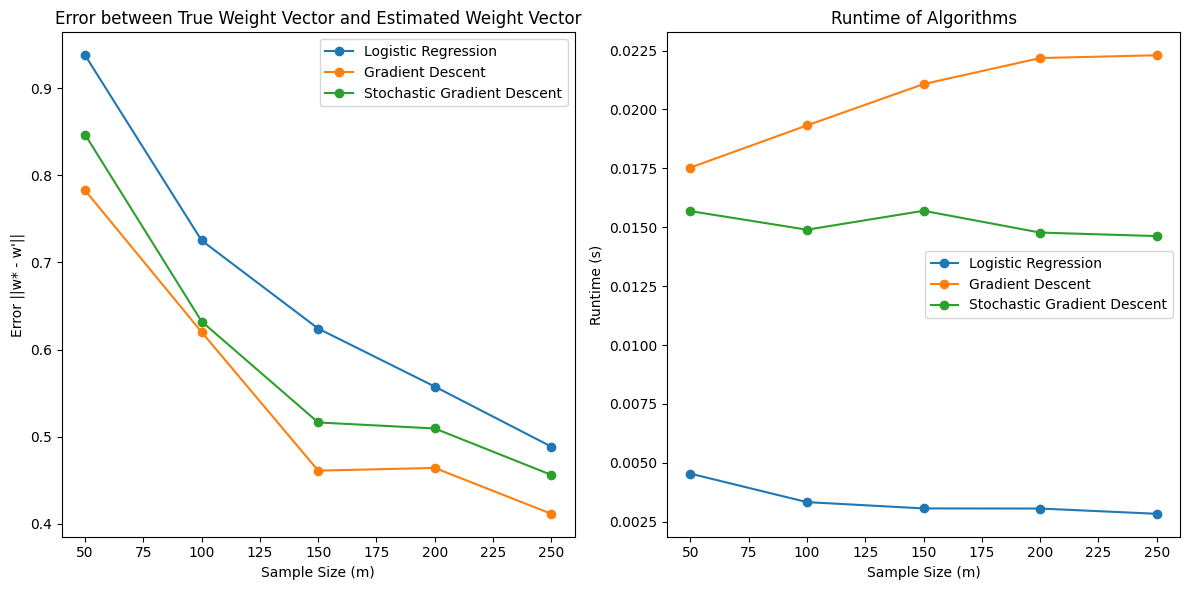

In [5]:
m_values = [50, 100, 150, 200, 250]
num_experiments = 10

algorithm1_results = []
algorithm2_results = []
algorithm3_results = []

for m in m_values:
    distances1 = []
    runtimes1 = []
    distances2 = []
    runtimes2 = []
    distances3 = []
    runtimes3 = []

    for _ in range(num_experiments):
        w_star, X, y = generate_data(m)

        start_time = time.time()
        w_prime = logistic_regression(X, y)
        end_time = time.time()
        runtime = end_time - start_time
        distance = np.linalg.norm(w_star - w_prime)
        distances1.append(distance)
        runtimes1.append(runtime)

        start_time = time.time()
        w_prime = gradient_descent(X, y)
        end_time = time.time()
        runtime = end_time - start_time
        distance = np.linalg.norm(w_star - w_prime)
        distances2.append(distance)
        runtimes2.append(runtime)

        start_time = time.time()
        w_prime = stochastic_gradient_descent(X, y)
        end_time = time.time()
        runtime = end_time - start_time
        distance = np.linalg.norm(w_star - w_prime)
        distances3.append(distance)
        runtimes3.append(runtime)

    algorithm1_results.append((np.mean(distances1), np.mean(runtimes1)))
    algorithm2_results.append((np.mean(distances2), np.mean(runtimes2)))
    algorithm3_results.append((np.mean(distances3), np.mean(runtimes3)))

distances1, runtimes1 = zip(*algorithm1_results)
distances2, runtimes2 = zip(*algorithm2_results)
distances3, runtimes3 = zip(*algorithm3_results)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting the distances
plt.subplot(1, 2, 1)
plt.plot(m_values, distances1, marker='o', label='Logistic Regression')
plt.plot(m_values, distances2, marker='o', label='Gradient Descent')
plt.plot(m_values, distances3, marker='o', label='Stochastic Gradient Descent')
plt.xlabel('Sample Size (m)')
plt.ylabel('Error ||w* - w\'||')
plt.title('Error between True Weight Vector and Estimated Weight Vector')
plt.legend()

# Plotting the runtimes
plt.subplot(1, 2, 2)
plt.plot(m_values, runtimes1, marker='o', label='Logistic Regression')
plt.plot(m_values, runtimes2, marker='o', label='Gradient Descent')
plt.plot(m_values, runtimes3, marker='o', label='Stochastic Gradient Descent')
plt.xlabel('Sample Size (m)')
plt.ylabel('Runtime (s)')
plt.title('Runtime of Algorithms')
plt.legend()

plt.tight_layout()
plt.show()


# Problem 2

In [6]:
from sklearn import datasets

In [7]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

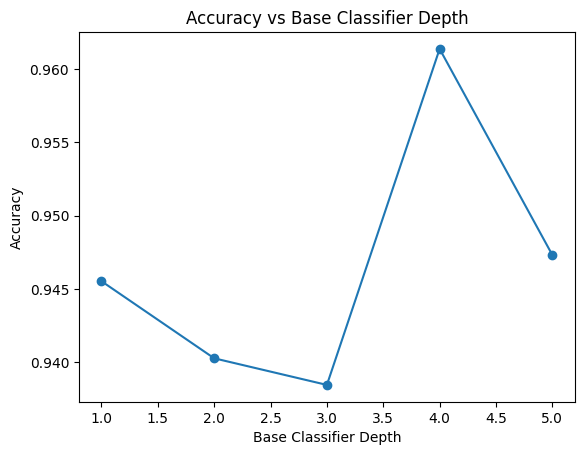

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import datasets

cancer = datasets.load_breast_cancer()

depths = [1, 2, 3, 4, 5]
accuracies = []

for depth in depths:
    base_learner = DecisionTreeClassifier(max_depth=depth, random_state=101)
    ada_boost = AdaBoostClassifier(estimator=base_learner, n_estimators=10, learning_rate=1, random_state=101)
    scores = cross_val_score(ada_boost, cancer.data, cancer.target, cv=10)
    accuracy = scores.mean()
    accuracies.append(accuracy)

# Plotting the accuracy against base classifier depth
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Base Classifier Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Base Classifier Depth')
plt.show()
